In [120]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np


In [ ]:
# Generate correlation matrix
df = pd.read_csv('fredgraph.csv')
df2 = df.copy()

del df['date'] #delete dates becayse they are objects
del df2['date']

import pandas as pd

# Create a list of possible shifts to test
shifts = range(0, 10)

# Create a dictionary to store the correlation coefficients for each shift
corr_dict = {}

# Iterate over each shift and calculate the correlation coefficients
for shift in shifts:
    # Shift the FFR column by the specified amount
    shifted_ffr = df2["FFR"].shift(shift)

    # Create a new DataFrame with the shifted FFR column and the RGDP and GDP columns
    df3 = pd.concat([shifted_ffr, df2[["RGDP", "GDP"]]], axis=1)

    # Calculate the correlation coefficients
    corr = df3.corr()

    # Store the correlation coefficients in the dictionary
    corr_dict[shift] = corr.loc["FFR", ["RGDP", "GDP"]].values.tolist()

# Find the shift with the highest correlation coefficient for each column
max_corr_RGDP = max(corr_dict.items(), key=lambda x: x[1][0])
max_corr_GDP = max(corr_dict.items(), key=lambda x: x[1][1])

# Print the results
print("The strongest correlation for RGDP is at shift", max_corr_RGDP[0], "with a correlation coefficient of", max_corr_RGDP[1][0])
print("The strongest correlation for GDP is at shift", max_corr_GDP[0], "with a correlation coefficient of", max_corr_GDP[1][1])



df2['FFR_lag'] = df['FFR'].shift(2)
columns_to_be_removed = ['FFR','CPIAUCSL_PC1']
df2 = df2.drop(columns_to_be_removed, axis = 'columns')
df2 = df2.dropna(how='any')
print(df2)


matrix = df2.corr()
print(matrix)

The strongest correlation for RGDP is at shift 9 with a correlation coefficient of -0.5593497926515185
The strongest correlation for GDP is at shift 9 with a correlation coefficient of -0.5937905555579308
         CPI      PCE      PPI  UNEMP       RGDP        GDP     M2  FFR_lag
2     29.590    332.1   31.633    5.5   3276.133    545.604  1.780     3.93
3     29.780    334.0   31.700    6.3   3234.087    540.197  1.737     3.70
4     29.840    334.5   31.800    6.8   3255.914    545.018  1.723     2.94
5     29.830    339.5   31.467    7.0   3311.181    555.545  1.725     2.30
6     29.947    342.4   31.500    6.8   3374.742    567.664  1.733     1.99
..       ...      ...      ...    ...        ...        ...    ...      ...
247  278.707  16518.0  241.697    4.2  20006.181  24349.121  1.142     0.07
248  284.894  16874.8  253.042    3.8  19924.088  24740.480  1.145     0.09
249  291.536  17261.4  272.937    3.6  19895.271  25248.476  1.165     0.08
250  295.496  17542.7  269.906    3

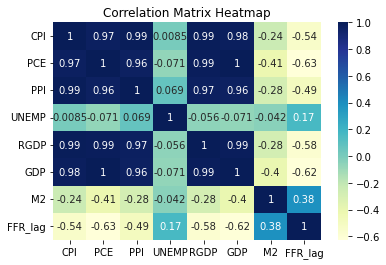

In [122]:
# Create heatmap
sns.heatmap(matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')

plt.show()

In [123]:
# Check for missing values
print(df2.isnull().sum())

CPI        0
PCE        0
PPI        0
UNEMP      0
RGDP       0
GDP        0
M2         0
FFR_lag    0
dtype: int64


Iteration 1, loss = 11777.27728757
Iteration 2, loss = 11699.64122883
Iteration 3, loss = 11635.29943226
Iteration 4, loss = 11570.16683536
Iteration 5, loss = 11493.28282775
Iteration 6, loss = 11403.54026848
Iteration 7, loss = 11299.69222838
Iteration 8, loss = 11171.34399196
Iteration 9, loss = 11019.37131627
Iteration 10, loss = 10835.62981262
Iteration 11, loss = 10614.00033249
Iteration 12, loss = 10361.13737199
Iteration 13, loss = 10061.87319485
Iteration 14, loss = 9724.26389411
Iteration 15, loss = 9367.79654599
Iteration 16, loss = 8993.00192270
Iteration 17, loss = 8603.04457290
Iteration 18, loss = 8276.93718698
Iteration 19, loss = 7999.21766861
Iteration 20, loss = 7775.73198938
Iteration 21, loss = 7671.02411676
Iteration 22, loss = 7619.93522353
Iteration 23, loss = 7578.35640286
Iteration 24, loss = 7510.10544974
Iteration 25, loss = 7404.77787007
Iteration 26, loss = 7280.14422754
Iteration 27, loss = 7154.91576869
Iteration 28, loss = 7040.08004842
Iteration 29, lo

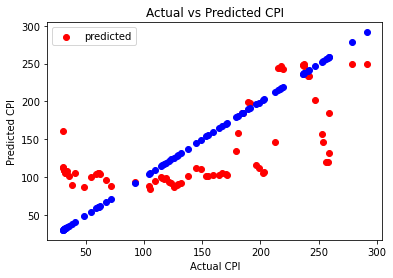

R2 score: 0.43
Mean squared error: 3500.05


In [124]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

y = df2['CPI']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual CPI')
plt.ylabel('Predicted CPI')
plt.title('Actual vs Predicted CPI')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 8428.77671682
Iteration 2, loss = 8358.62253566
Iteration 3, loss = 8301.09233346
Iteration 4, loss = 8242.58522908
Iteration 5, loss = 8173.55507921
Iteration 6, loss = 8093.06964454
Iteration 7, loss = 8000.09770437
Iteration 8, loss = 7884.74393233
Iteration 9, loss = 7749.46736734
Iteration 10, loss = 7584.96867867
Iteration 11, loss = 7388.13529735
Iteration 12, loss = 7164.15810109
Iteration 13, loss = 6901.92302290
Iteration 14, loss = 6611.35914326
Iteration 15, loss = 6304.64978778
Iteration 16, loss = 5993.74896714
Iteration 17, loss = 5677.83393814
Iteration 18, loss = 5428.96820405
Iteration 19, loss = 5235.98778876
Iteration 20, loss = 5097.72721959
Iteration 21, loss = 5054.74420718
Iteration 22, loss = 5032.63740493
Iteration 23, loss = 4991.75309169
Iteration 24, loss = 4925.44639701
Iteration 25, loss = 4835.55325792
Iteration 26, loss = 4742.34797038
Iteration 27, loss = 4653.53683695
Iteration 28, loss = 4573.67098901
Iteration 29, loss = 4491.220

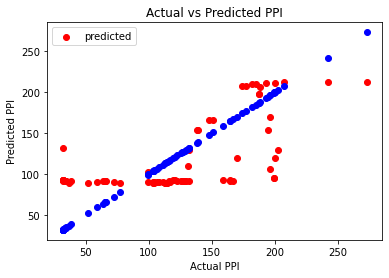

R2 score: 0.43
Mean squared error: 2004.72


In [125]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

y = df2['PPI']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual PPI')
plt.ylabel('Predicted PPI')
plt.title('Actual vs Predicted PPI')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 24787423.09712128
Iteration 2, loss = 24784857.34054000
Iteration 3, loss = 24782659.31707778
Iteration 4, loss = 24780474.99008004
Iteration 5, loss = 24777902.84814263
Iteration 6, loss = 24774843.07961871
Iteration 7, loss = 24771270.32103465
Iteration 8, loss = 24766800.67558128
Iteration 9, loss = 24761394.01681786
Iteration 10, loss = 24754712.09973430
Iteration 11, loss = 24746330.84928776
Iteration 12, loss = 24736308.51823159
Iteration 13, loss = 24723695.16506521
Iteration 14, loss = 24708285.71565861
Iteration 15, loss = 24690345.20480537
Iteration 16, loss = 24668977.28948341
Iteration 17, loss = 24642281.65193188
Iteration 18, loss = 24612155.79007699
Iteration 19, loss = 24575998.99246021
Iteration 20, loss = 24535024.85479499
Iteration 21, loss = 24483743.51619807
Iteration 22, loss = 24427661.55002628
Iteration 23, loss = 24361125.33591451
Iteration 24, loss = 24287811.07956528
Iteration 25, loss = 24203389.58720203
Iteration 26, loss = 24105746.6735

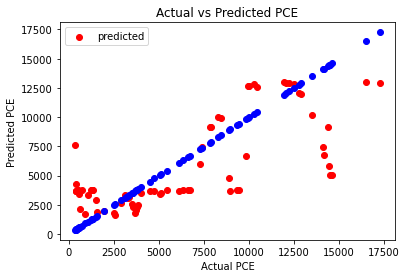

R2 score: 0.53
Mean squared error: 11218003.74


In [126]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

y = df2['PCE']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual PCE')
plt.ylabel('Predicted PCE')
plt.title('Actual vs Predicted PCE')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Percent Change



Iteration 1, loss = 54680466.97858647
Iteration 2, loss = 54676525.59873287
Iteration 3, loss = 54673158.57356964
Iteration 4, loss = 54669800.17373215
Iteration 5, loss = 54665835.81831918
Iteration 6, loss = 54661132.94722300
Iteration 7, loss = 54655630.21554742
Iteration 8, loss = 54648728.44221216
Iteration 9, loss = 54640374.18169851
Iteration 10, loss = 54630038.14748964
Iteration 11, loss = 54617089.33002272
Iteration 12, loss = 54601585.26913480
Iteration 13, loss = 54582086.31369621
Iteration 14, loss = 54558283.97951479
Iteration 15, loss = 54530457.33059549
Iteration 16, loss = 54497315.50160803
Iteration 17, loss = 54456012.47414801
Iteration 18, loss = 54409105.80163550
Iteration 19, loss = 54352687.94269263
Iteration 20, loss = 54288981.64092488
Iteration 21, loss = 54208760.60253647
Iteration 22, loss = 54120954.21476160
Iteration 23, loss = 54016331.67357111
Iteration 24, loss = 53900786.97290013
Iteration 25, loss = 53766984.88670210
Iteration 26, loss = 53611518.0837

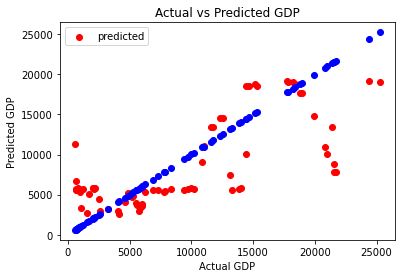

R2 score: 0.52
Mean squared error: 24497863.68


In [127]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

df2.fillna(0, inplace=True)


y = df2['GDP']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 64497173.52034997
Iteration 2, loss = 64490977.65151510
Iteration 3, loss = 64485782.49909867
Iteration 4, loss = 64480508.89999615
Iteration 5, loss = 64474223.40706508
Iteration 6, loss = 64466762.95606086
Iteration 7, loss = 64457926.54627310
Iteration 8, loss = 64446933.55662905
Iteration 9, loss = 64433572.72045885
Iteration 10, loss = 64416800.15391656
Iteration 11, loss = 64396026.56980260
Iteration 12, loss = 64370525.39642724
Iteration 13, loss = 64339189.94900899
Iteration 14, loss = 64301564.00563554
Iteration 15, loss = 64256197.01236835
Iteration 16, loss = 64202208.61803177
Iteration 17, loss = 64136682.41445141
Iteration 18, loss = 64059955.29998944
Iteration 19, loss = 63967734.46764468
Iteration 20, loss = 63864816.32312720
Iteration 21, loss = 63735171.96193233
Iteration 22, loss = 63592292.07857026
Iteration 23, loss = 63422159.70788212
Iteration 24, loss = 63233037.74015500
Iteration 25, loss = 63014319.72454956
Iteration 26, loss = 62761221.5891

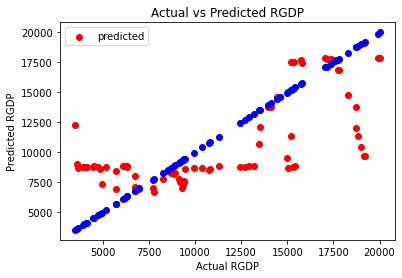

R2 score: 0.46
Mean squared error: 14039626.23


In [128]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

df2.fillna(0, inplace=True)


y = df2['RGDP']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual RGDP')
plt.ylabel('Predicted RGDP')
plt.title('Actual vs Predicted RGDP')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 1.65027651
Iteration 2, loss = 0.65867228
Iteration 3, loss = 0.32749872
Iteration 4, loss = 0.33337964
Iteration 5, loss = 0.33227178
Iteration 6, loss = 0.25577794
Iteration 7, loss = 0.19256684
Iteration 8, loss = 0.16519424
Iteration 9, loss = 0.13603820
Iteration 10, loss = 0.10389939
Iteration 11, loss = 0.08399793
Iteration 12, loss = 0.06280079
Iteration 13, loss = 0.04521452
Iteration 14, loss = 0.03712411
Iteration 15, loss = 0.02838678
Iteration 16, loss = 0.02618906
Iteration 17, loss = 0.02337281
Iteration 18, loss = 0.02313843
Iteration 19, loss = 0.02149191
Iteration 20, loss = 0.02038618
Iteration 21, loss = 0.01921009
Iteration 22, loss = 0.01756514
Iteration 23, loss = 0.01682353
Iteration 24, loss = 0.01620148
Iteration 25, loss = 0.01591627
Iteration 26, loss = 0.01583425
Iteration 27, loss = 0.01586037
Iteration 28, loss = 0.01571465
Iteration 29, loss = 0.01585154
Iteration 30, loss = 0.01569777
Iteration 31, loss = 0.01564830
Iteration 32, los

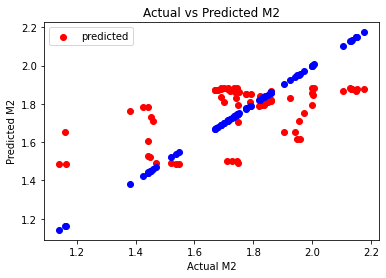

R2 score: 0.26
Mean squared error: 0.04


In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

df2.fillna(0, inplace=True)


y = df2['M2']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual M2')
plt.ylabel('Predicted M2')
plt.title('Actual vs Predicted M2')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 20.12259962
Iteration 2, loss = 15.86140759
Iteration 3, loss = 12.94949141
Iteration 4, loss = 10.51443011
Iteration 5, loss = 8.23394102
Iteration 6, loss = 6.44429688
Iteration 7, loss = 5.36113858
Iteration 8, loss = 5.23023945
Iteration 9, loss = 5.36333410
Iteration 10, loss = 5.30242711
Iteration 11, loss = 4.86597287
Iteration 12, loss = 4.37610249
Iteration 13, loss = 4.07930433
Iteration 14, loss = 3.87885695
Iteration 15, loss = 3.66772921
Iteration 16, loss = 3.39718456
Iteration 17, loss = 3.07928801
Iteration 18, loss = 2.80050912
Iteration 19, loss = 2.54863308
Iteration 20, loss = 2.26295483
Iteration 21, loss = 1.98810831
Iteration 22, loss = 1.76553696
Iteration 23, loss = 1.56647758
Iteration 24, loss = 1.41505202
Iteration 25, loss = 1.29467280
Iteration 26, loss = 1.22577625
Iteration 27, loss = 1.19088795
Iteration 28, loss = 1.16916454
Iteration 29, loss = 1.15272674
Iteration 30, loss = 1.16179279
Iteration 31, loss = 1.14979087
Iteration 32,

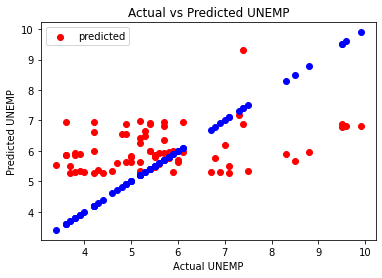

R2 score: -0.01
Mean squared error: 2.37


In [130]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

df2.fillna(0, inplace=True)


y = df2['UNEMP']
X = df2['FFR_lag']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.ravel(), test_size=0.3, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),max_iter=2000, batch_size=64,random_state=69,verbose=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

#plt.scatter(y_test, y_pred, c='b', label='test')
plt.scatter(y_test, y_pred, c='r', label='predicted')
plt.legend()

plt.scatter(y_test, y_test, c='b', label='test')
#plt.scatter(y_pred, y_pred, c='r', label='predicted')
plt.xlabel('Actual UNEMP')
plt.ylabel('Predicted UNEMP')
plt.title('Actual vs Predicted UNEMP')

plt.show()


print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))